# **Install and Import Library**

In [1]:
!pip3 install Sastrawi

In [2]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
# Download resource nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# inisialisasi tqdm untuk melihat progress
tqdm.pandas()

# **Load Dataset**

In [7]:
df_news_data = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_20240928_edukasi_ekonomi.csv", encoding='latin1')
df_news_data

,Judul,Tag,Link,Text,Date,Portal Berita
0,OJK Klarifikasi soal Dana Pensiun Tak Bisa Cai...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409081...,Otoritas Jasa Keuangan (OJK) memberi klarifika...,2024-09-08T12:50:30+07:00,CNN
1,"Mariyati, AgenBRILink Pahlawan Inklusi Keuanga...",Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409061...,PT Bank Rakyat Indonesia (Persero) Tbk atau BR...,2024-09-06T13:12:04+07:00,CNN
2,Kolaborasi BPJS Ketenagakerjaan Lindungi Peker...,Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409051...,BPJS Ketenagakerjaan mengambil langkah kolabor...,2024-09-05T17:37:42+07:00,CNN
3,Bos Bapanas Buka Suara soal Peluang Korban PHK...,Berita Bisnis,https://www.cnnindonesia.com/ekonomi/202409041...,Badan Pangan Nasional (Bapanas) menjelaskan me...,2024-09-04T16:55:22+07:00,CNN
4,Curhat Risma Kala Mau Bantu Korban PHK,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409031...,Menteri Sosial Tri Rismaharini mengaku siap me...,2024-09-03T21:01:30+07:00,CNN
...,...,...,...,...,...,...
1721,Pemerintah Klaim Sedikit Warga yang Disubsidi ...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202006181...,Menteri Koordinator Bidang Pembangunan Manusia...,2020-06-18T17:43:35+07:00,CNN
1722,Dirut BPJS Kesehatan Akui Fraud 1 Persen dalam...,Berita Keuangan,https://www.cnnindonesia.com/ekonomi/202006181...,BPJS Kesehatan mengakui temuan praktik fraud (...,2020-06-18T13:46:46+07:00,CNN
1723,BPJS dan Lemhannas Sepakat Tingkatkan Kualitas...,Ragam Keuangan,https://www.cnnindonesia.com/ekonomi/202006171...,BPJS Kesehatan mengadakan kerja sama di bidang...,2020-06-17T17:43:36+07:00,CNN
1724,"Tapera, Program Iuran Wajib Bagi Pekerja Selai...",NaN,https://www.cnnindonesia.com/ekonomi/202006061...,Tapera resmi menjadi program wajib bagi pekerj...,2020-06-07T08:28:02+07:00,CNN


In [8]:
df_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul          1726 non-null   object
 1   Tag            1717 non-null   object
 2   Link           1726 non-null   object
 3   Text           1726 non-null   object
 4   Date           1726 non-null   object
 5   Portal Berita  1726 non-null   object
dtypes: object(6)
memory usage: 81.0+ KB


In [9]:
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_20240928_edukasi_ekonomi.csv", encoding='latin1')
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita
0,OJK Klarifikasi soal Dana Pensiun Tak Bisa Cai...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409081...,Otoritas Jasa Keuangan (OJK) memberi klarifika...,2024-09-08T12:50:30+07:00,CNN
1,"Mariyati, AgenBRILink Pahlawan Inklusi Keuanga...",Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409061...,PT Bank Rakyat Indonesia (Persero) Tbk atau BR...,2024-09-06T13:12:04+07:00,CNN
2,Kolaborasi BPJS Ketenagakerjaan Lindungi Peker...,Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409051...,BPJS Ketenagakerjaan mengambil langkah kolabor...,2024-09-05T17:37:42+07:00,CNN
3,Bos Bapanas Buka Suara soal Peluang Korban PHK...,Berita Bisnis,https://www.cnnindonesia.com/ekonomi/202409041...,Badan Pangan Nasional (Bapanas) menjelaskan me...,2024-09-04T16:55:22+07:00,CNN
4,Curhat Risma Kala Mau Bantu Korban PHK,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409031...,Menteri Sosial Tri Rismaharini mengaku siap me...,2024-09-03T21:01:30+07:00,CNN
...,...,...,...,...,...,...
1721,Pemerintah Klaim Sedikit Warga yang Disubsidi ...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202006181...,Menteri Koordinator Bidang Pembangunan Manusia...,2020-06-18T17:43:35+07:00,CNN
1722,Dirut BPJS Kesehatan Akui Fraud 1 Persen dalam...,Berita Keuangan,https://www.cnnindonesia.com/ekonomi/202006181...,BPJS Kesehatan mengakui temuan praktik fraud (...,2020-06-18T13:46:46+07:00,CNN
1723,BPJS dan Lemhannas Sepakat Tingkatkan Kualitas...,Ragam Keuangan,https://www.cnnindonesia.com/ekonomi/202006171...,BPJS Kesehatan mengadakan kerja sama di bidang...,2020-06-17T17:43:36+07:00,CNN
1724,"Tapera, Program Iuran Wajib Bagi Pekerja Selai...",NaN,https://www.cnnindonesia.com/ekonomi/202006061...,Tapera resmi menjadi program wajib bagi pekerj...,2020-06-07T08:28:02+07:00,CNN


# Bagian Bawah

In [47]:
# Membaca data dari file CSV
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_20240928_edukasi_ekonomi.csv", encoding='latin1')

# Menambahkan kolom hasil pemrosesan ke DataFrame
# Misalnya, jika Anda sudah memiliki fungsi atau metode untuk menghasilkan kolom-kolom ini, pastikan untuk menerapkannya di sini
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text['stem'] = df_news_text['no_stopwords'].apply(stemmer.stem)
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)

# Menampilkan DataFrame dengan kolom baru
print(df_news_text.loc[:, ["Judul", "Tag", "Link", "Date", "Portal Berita", "Text", "n_words", "clean", "n_clean", "no_stopwords", "n_no_stopwords", "stem", "tokens"]])

                                                  Judul  \
0     OJK Klarifikasi soal Dana Pensiun Tak Bisa Cai...   
1     Mariyati, AgenBRILink Pahlawan Inklusi Keuanga...   
2     Kolaborasi BPJS Ketenagakerjaan Lindungi Peker...   
3     Bos Bapanas Buka Suara soal Peluang Korban PHK...   
4                Curhat Risma Kala Mau Bantu Korban PHK   
...                                                 ...   
1721  Pemerintah Klaim Sedikit Warga yang Disubsidi ...   
1722  Dirut BPJS Kesehatan Akui Fraud 1 Persen dalam...   
1723  BPJS dan Lemhannas Sepakat Tingkatkan Kualitas...   
1724  Tapera, Program Iuran Wajib Bagi Pekerja Selai...   
1725  FPP BNI Singgung Pengelolaan Dana Pensiun Rp550 M   

                          Tag  \
0                Berita Makro   
1     Berita Corporate Action   
2     Berita Corporate Action   
3               Berita Bisnis   
4                Berita Makro   
...                       ...   
1721             Berita Makro   
1722          Berita Keuang

In [49]:
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,OJK Klarifikasi soal Dana Pensiun Tak Bisa Cai...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409081...,Otoritas Jasa Keuangan (OJK) memberi klarifika...,2024-09-08T12:50:30+07:00,CNN,397,Otoritas Jasa Keuangan OJK memberi klarifikasi...,385,Otoritas Jasa Keuangan OJK klarifikasi dana pe...,227,otoritas jasa uang ojk klarifikasi dana pensiu...,"[otoritas, jasa, uang, ojk, klarifikasi, dana,..."
1,"Mariyati, AgenBRILink Pahlawan Inklusi Keuanga...",Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409061...,PT Bank Rakyat Indonesia (Persero) Tbk atau BR...,2024-09-06T13:12:04+07:00,CNN,397,PT Bank Rakyat Indonesia Persero Tbk atau BRI ...,389,PT Bank Rakyat Indonesia Persero Tbk BRI AgenB...,260,pt bank rakyat indonesia persero tbk bri agenb...,"[pt, bank, rakyat, indonesia, persero, tbk, br..."
2,Kolaborasi BPJS Ketenagakerjaan Lindungi Peker...,Berita Corporate Action,https://www.cnnindonesia.com/ekonomi/202409051...,BPJS Ketenagakerjaan mengambil langkah kolabor...,2024-09-05T17:37:42+07:00,CNN,335,BPJS Ketenagakerjaan mengambil langkah kolabor...,330,BPJS Ketenagakerjaan mengambil langkah kolabor...,224,bpjs ketenagakerjaan ambil langkah kolaborasi ...,"[bpjs, ketenagakerjaan, ambil, langkah, kolabo..."
3,Bos Bapanas Buka Suara soal Peluang Korban PHK...,Berita Bisnis,https://www.cnnindonesia.com/ekonomi/202409041...,Badan Pangan Nasional (Bapanas) menjelaskan me...,2024-09-04T16:55:22+07:00,CNN,398,Badan Pangan Nasional Bapanas menjelaskan meka...,394,Badan Pangan Nasional Bapanas mekanisme pengad...,244,badan pangan nasional bapanas mekanisme ada ba...,"[badan, pangan, nasional, bapanas, mekanisme, ..."
4,Curhat Risma Kala Mau Bantu Korban PHK,Berita Makro,https://www.cnnindonesia.com/ekonomi/202409031...,Menteri Sosial Tri Rismaharini mengaku siap me...,2024-09-03T21:01:30+07:00,CNN,349,Menteri Sosial Tri Rismaharini mengaku siap me...,348,Menteri Sosial Tri Rismaharini mengaku membant...,204,menteri sosial tri rismaharini aku bantu korba...,"[menteri, sosial, tri, rismaharini, aku, bantu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,Pemerintah Klaim Sedikit Warga yang Disubsidi ...,Berita Makro,https://www.cnnindonesia.com/ekonomi/202006181...,Menteri Koordinator Bidang Pembangunan Manusia...,2020-06-18T17:43:35+07:00,CNN,236,Menteri Koordinator Bidang Pembangunan Manusia...,235,Menteri Koordinator Bidang Pembangunan Manusia...,141,menteri koordinator bidang bangun manusia buda...,"[menteri, koordinator, bidang, bangun, manusia..."
1722,Dirut BPJS Kesehatan Akui Fraud 1 Persen dalam...,Berita Keuangan,https://www.cnnindonesia.com/ekonomi/202006181...,BPJS Kesehatan mengakui temuan praktik fraud (...,2020-06-18T13:46:46+07:00,CNN,240,BPJS Kesehatan mengakui temuan praktik fraud c...,235,BPJS Kesehatan mengakui temuan praktik fraud c...,158,bpjs sehat aku temu praktik fraud curang selen...,"[bpjs, sehat, aku, temu, praktik, fraud, curan..."
1723,BPJS dan Lemhannas Sepakat Tingkatkan Kualitas...,Ragam Keuangan,https://www.cnnindonesia.com/ekonomi/202006171...,BPJS Kesehatan mengadakan kerja sama di bidang...,2020-06-17T17:43:36+07:00,CNN,243,BPJS Kesehatan mengadakan kerja sama di bidang...,242,BPJS Kesehatan mengadakan kerja bidang peningk...,174,bpjs sehat ada kerja bidang tingkat kualitas s...,"[bpjs, sehat, ada, kerja, bidang, tingkat, kua..."
1724,"Tapera, Program Iuran Wajib Bagi Pekerja Selai...",NaN,https://www.cnnindonesia.com/ekonomi/202006061...,Tapera resmi menjadi program wajib bagi pekerj...,2020-06-07T08:28:02+07:00,CNN,38,Tapera resmi menjadi program wajib bagi pekerj...,36,Tapera resmi program wajib pekerja Program men...,24,tapera resmi program wajib kerja program sasar...,"[tapera, resmi, program, wajib, kerja, program..."


In [50]:
# Menyimpan DataFrame yang sudah diperbarui ke dalam file CSV dan Excel
df_news_text.to_csv("news_kompas_cnn_ed-ek_preprocessing.csv", index=False)
df_news_text.to_excel("news_kompas_cnn_ed-ek_preprocessing.xlsx", index=False)

### pembatas

In [11]:
# Function untuk menghitung jumlah kata di dalam teks
def word_count(text: str) -> int:
  return len(text.split())

In [12]:
# Ambil teks nya saja ke DataFrame baru, dan buat kolom baru 'n_words' untuk menampung jumlah kata
df_news_text = df_news_data[['Text']].copy()
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text.head()

,Text,n_words
0,Otoritas Jasa Keuangan (OJK) memberi klarifika...,397
1,PT Bank Rakyat Indonesia (Persero) Tbk atau BR...,397
2,BPJS Ketenagakerjaan mengambil langkah kolabor...,335
3,Badan Pangan Nasional (Bapanas) menjelaskan me...,398
4,Menteri Sosial Tri Rismaharini mengaku siap me...,349


# **Preprocessing**

## **Remove Outliers (Short) Text**

Hapus teks yang isinya terlalu sedikit (karena hasil scrap tidak sempurna)

In [13]:
def remove_outliers(df, column, non_outlier_rule='-3 < z < 3', reset_index=True):
  df_mean = df[column].mean()
  df_std = df[column].std()

  df['z_score'] = stats.zscore(df[column])
  df['outlier'] = df['z_score'].apply(lambda z: False if eval(non_outlier_rule) else True)

  print(df['outlier'].value_counts())

  outliers = df.loc[df['outlier'] == True].drop(columns=['outlier', 'z_score'])
  if reset_index:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score']).reset_index(drop=True)
  else:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score'])

  return no_outliers, outliers

In [14]:
df_news_text, outliers = remove_outliers(df_news_text, 'n_words', 'z > -1', True)

outlier
False    1614
True      112
Name: count, dtype: int64


In [15]:
outliers.sort_values(by=['n_words'], ascending=False).head(10)

,Text,n_words
271,Pemerintah tengah mengkaji rencana kenaikan iu...,208
627,Pemerintah akan mengoptimalkan program jaminan...,207
507,Bantuan Subsidi Upah (BSU) atau BLT gaji 2022 ...,207
1408,Pemerintah mengaku akan berkonsultasi dengan K...,207
1333,Menteri Keuangan Sri Mulyani Indrawati akan me...,206
487,Kementerian Ketenagakerjaan (Kemnaker) memasti...,206
697,Direktur Jenderal Anggaran Kementerian Keuanga...,206
1630,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,206
549,Kementerian Ketenagakerjaan menetapkan tiga sy...,206
648,Anggota Ombudsman Robert Na Endi Jaweng menyor...,205


In [16]:
df_news_text

,Text,n_words
0,Otoritas Jasa Keuangan (OJK) memberi klarifika...,397
1,PT Bank Rakyat Indonesia (Persero) Tbk atau BR...,397
2,BPJS Ketenagakerjaan mengambil langkah kolabor...,335
3,Badan Pangan Nasional (Bapanas) menjelaskan me...,398
4,Menteri Sosial Tri Rismaharini mengaku siap me...,349
...,...,...
1609,Direktur Utama BPJS Kesehatan Fachmi Idris men...,507
1610,Menteri Koordinator Bidang Pembangunan Manusia...,236
1611,BPJS Kesehatan mengakui temuan praktik fraud (...,240
1612,BPJS Kesehatan mengadakan kerja sama di bidang...,243


## **Make Lowercase**

In [17]:
# Buat semua teks menjadi format lowercase
df_news_text['Text'] = df_news_text['Text'].apply(str.lower)
df_news_text.head(5)

,Text,n_words
0,otoritas jasa keuangan (ojk) memberi klarifika...,397
1,pt bank rakyat indonesia (persero) tbk atau br...,397
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335
3,badan pangan nasional (bapanas) menjelaskan me...,398
4,menteri sosial tri rismaharini mengaku siap me...,349


## **Filtering by Keywords**

In [18]:
def filtering_by_keywords(df, column, keywords):
  """Buat keyword urut dari yang akan dipertahankan, baru kemudian keyword yang akan dihapus"""
  for key in keywords:
    # Hapus teks yang mengandung keyword dengan tanda (-)
    if key[0] == '-':
      pattern = f".*{key[1:]}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == False].reset_index(drop=True).drop(columns=[key])
    # Pertahankan teks yang tidak mengandung keyword dengan tanda (-)
    else:
      pattern = f".*{key}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == True].reset_index(drop=True).drop(columns=[key])
  return df

In [22]:
# Hanya mengambil teks yang mengandung kata halal, tanpa bihalal, bi halal, logo, dll.
#keywords = ['halal', '-bihalal', '-bi halal', '-logo']
#df_news_text = filtering_by_keywords(df_news_text, 'text', keywords)

In [19]:
df_news_text

,Text,n_words
0,otoritas jasa keuangan (ojk) memberi klarifika...,397
1,pt bank rakyat indonesia (persero) tbk atau br...,397
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335
3,badan pangan nasional (bapanas) menjelaskan me...,398
4,menteri sosial tri rismaharini mengaku siap me...,349
...,...,...
1609,direktur utama bpjs kesehatan fachmi idris men...,507
1610,menteri koordinator bidang pembangunan manusia...,236
1611,bpjs kesehatan mengakui temuan praktik fraud (...,240
1612,bpjs kesehatan mengadakan kerja sama di bidang...,243


## **Cleaning Text**

In [25]:
def cleaning_text(text):
  # Menambah spasi setelah koma pada koma yang tidak diberi spasi
  text = re.sub(r",(?!\s)", ", ", text)
  # Menghapus tab, new line, back slice, dll
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
  # Menghapus karakter non ASCII (emoticon, chinese word, dll),
  text = text.encode('ascii', 'replace').decode('ascii')
  # Menghapus URL
  text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
  # Menghapus angka
  text = re.sub(r"\d+", "", text)
  # Menghapus tanda baca
  text = text.translate(str.maketrans("", "", string.punctuation))
  # Menghapus whitespace di depan/belakang teks dan double++ spasi
  text = text.strip()
  text = re.sub('\s+', ' ', text)
  # Menghapus single character
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [26]:
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)

In [27]:
# Hitung jumlah kata setelah pembersihan
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords
0,otoritas jasa keuangan (ojk) memberi klarifika...,397,otoritas jasa keuangan ojk memberi klarifikasi...,385,otoritas jasa keuangan ojk klarifikasi dana pe...
1,pt bank rakyat indonesia (persero) tbk atau br...,397,pt bank rakyat indonesia persero tbk atau bri ...,389,pt bank rakyat indonesia persero tbk bri agenb...
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335,bpjs ketenagakerjaan mengambil langkah kolabor...,330,bpjs ketenagakerjaan mengambil langkah kolabor...
3,badan pangan nasional (bapanas) menjelaskan me...,398,badan pangan nasional bapanas menjelaskan meka...,394,badan pangan nasional bapanas mekanisme pengad...
4,menteri sosial tri rismaharini mengaku siap me...,349,menteri sosial tri rismaharini mengaku siap me...,348,menteri sosial tri rismaharini mengaku membant...


## **Remove Stopwords**

In [28]:
# Dapatkan stopwords Indonesia dari nltk
stop = stopwords.words('indonesian')
print(f"Total ada {len(stop)} kata yang terdaftar sebagai stopwords Indonesia di nltk")
print(f"Contohnya adalah: {stop[:10]}")

Total ada 758 kata yang terdaftar sebagai stopwords Indonesia di nltk
Contohnya adalah: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [29]:
# Hapus stopwords dari teks berita
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
# Hitung jumlah kata setelah penghapusan stopwords
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords
0,otoritas jasa keuangan (ojk) memberi klarifika...,397,otoritas jasa keuangan ojk memberi klarifikasi...,385,otoritas jasa keuangan ojk klarifikasi dana pe...,211
1,pt bank rakyat indonesia (persero) tbk atau br...,397,pt bank rakyat indonesia persero tbk atau bri ...,389,pt bank rakyat indonesia persero tbk bri agenb...,244
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335,bpjs ketenagakerjaan mengambil langkah kolabor...,330,bpjs ketenagakerjaan mengambil langkah kolabor...,214
3,badan pangan nasional (bapanas) menjelaskan me...,398,badan pangan nasional bapanas menjelaskan meka...,394,badan pangan nasional bapanas mekanisme pengad...,229
4,menteri sosial tri rismaharini mengaku siap me...,349,menteri sosial tri rismaharini mengaku siap me...,348,menteri sosial tri rismaharini mengaku membant...,184


## **Stemming**

In [31]:
# Membuat object stemmer dari library Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
# Lakukan stemming untuk menghapus imbuhan dari setiap kata
df_news_text['stem'] = df_news_text['no_stopwords'].progress_apply(stemmer.stem)

100%|██████████████████████████████████████████████████████████████████████████████| 1614/1614 [35:42<00:00,  1.33s/it]


In [33]:
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem
0,otoritas jasa keuangan (ojk) memberi klarifika...,397,otoritas jasa keuangan ojk memberi klarifikasi...,385,otoritas jasa keuangan ojk klarifikasi dana pe...,211,otoritas jasa uang ojk klarifikasi dana pensiu...
1,pt bank rakyat indonesia (persero) tbk atau br...,397,pt bank rakyat indonesia persero tbk atau bri ...,389,pt bank rakyat indonesia persero tbk bri agenb...,244,pt bank rakyat indonesia persero tbk bri agenb...
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335,bpjs ketenagakerjaan mengambil langkah kolabor...,330,bpjs ketenagakerjaan mengambil langkah kolabor...,214,bpjs ketenagakerjaan ambil langkah kolaborasi ...
3,badan pangan nasional (bapanas) menjelaskan me...,398,badan pangan nasional bapanas menjelaskan meka...,394,badan pangan nasional bapanas mekanisme pengad...,229,badan pangan nasional bapanas mekanisme ada ba...
4,menteri sosial tri rismaharini mengaku siap me...,349,menteri sosial tri rismaharini mengaku siap me...,348,menteri sosial tri rismaharini mengaku membant...,184,menteri sosial tri rismaharini aku bantu korba...


## **Frequency Words**

In [34]:
# Mendapatkan nilai freq words dalam DataFrame
def freq_words(df_column):
  all_words = ' '.join([text for text in df_column])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  return pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

In [35]:
# Plotting bar chart untuk <n> kata paling sering muncul
def bar_freq_words(df, column, n = 30):
  d = df.nlargest(columns=column, n = n)
  plt.figure(figsize=(50,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [51]:
# Dapatkan freq words hasil dari stemming, urut dari yang terbesar
df_words = freq_words(df_news_text['stem']).sort_values(by=['count'], ascending=False)
df_words.head()

,word,count
502,sehat,8848
78,bpjs,8161
51,kerja,6434
8,serta,5609
200,rp,4115


In [37]:
# Simpan hasilnya ke dalam CSV
output_file = 'freq_words.csv'
df_words.to_csv(output_file, index=False, sep=";")

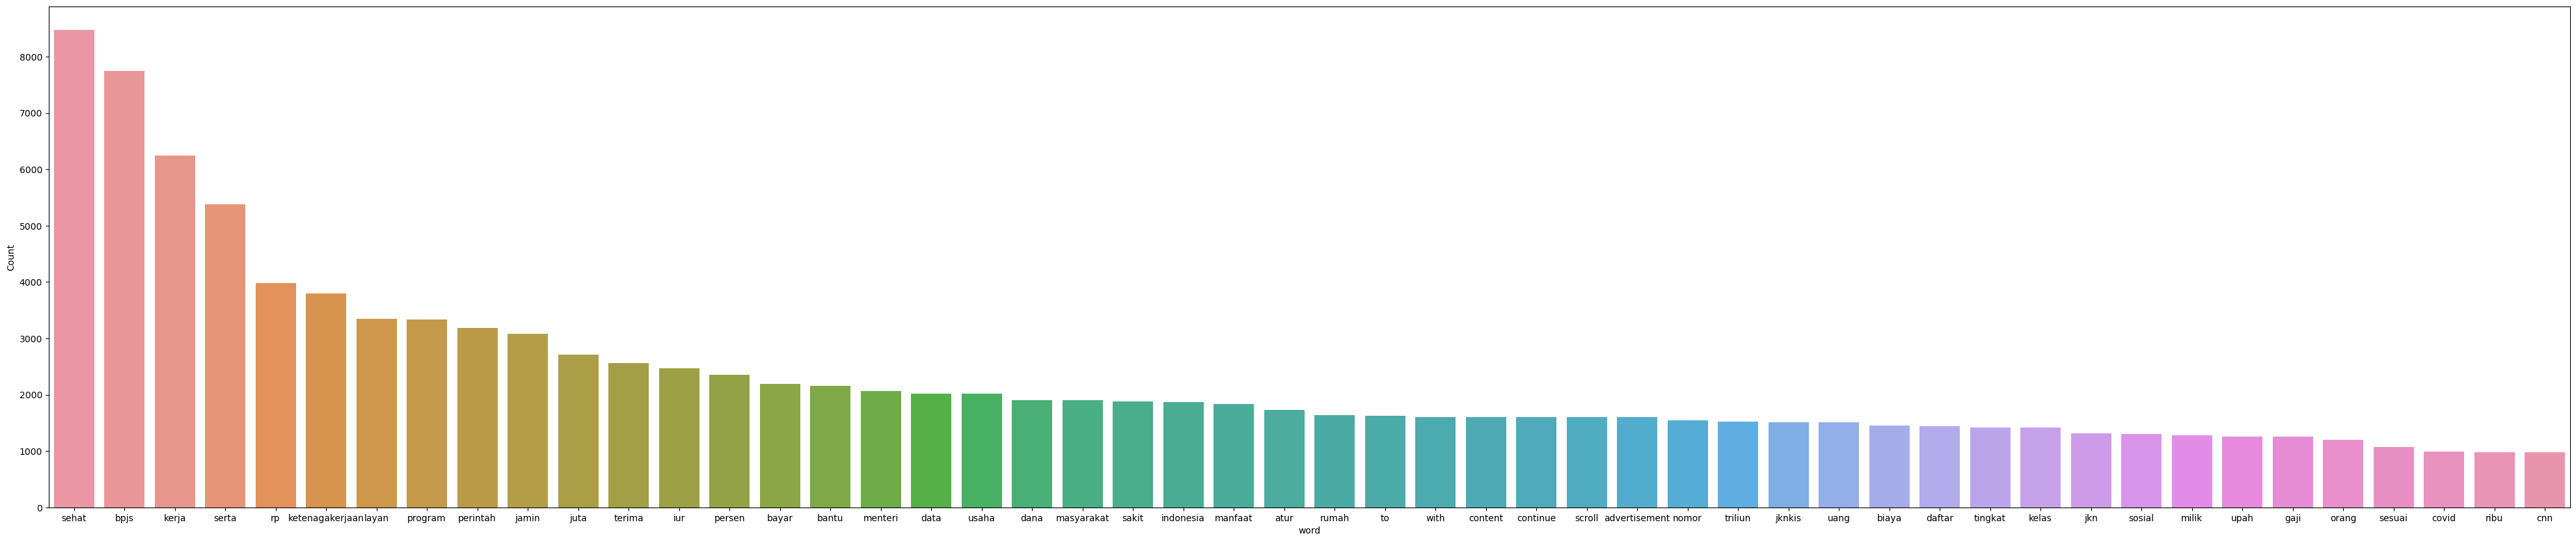

In [38]:
# Buat bar chart untuk freq words
bar_freq_words(df_words, 'count', 50)

## **Tokenization**

In [39]:
# NLTK word rokenize
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,otoritas jasa keuangan (ojk) memberi klarifika...,397,otoritas jasa keuangan ojk memberi klarifikasi...,385,otoritas jasa keuangan ojk klarifikasi dana pe...,211,otoritas jasa uang ojk klarifikasi dana pensiu...,"[otoritas, jasa, uang, ojk, klarifikasi, dana,..."
1,pt bank rakyat indonesia (persero) tbk atau br...,397,pt bank rakyat indonesia persero tbk atau bri ...,389,pt bank rakyat indonesia persero tbk bri agenb...,244,pt bank rakyat indonesia persero tbk bri agenb...,"[pt, bank, rakyat, indonesia, persero, tbk, br..."
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335,bpjs ketenagakerjaan mengambil langkah kolabor...,330,bpjs ketenagakerjaan mengambil langkah kolabor...,214,bpjs ketenagakerjaan ambil langkah kolaborasi ...,"[bpjs, ketenagakerjaan, ambil, langkah, kolabo..."
3,badan pangan nasional (bapanas) menjelaskan me...,398,badan pangan nasional bapanas menjelaskan meka...,394,badan pangan nasional bapanas mekanisme pengad...,229,badan pangan nasional bapanas mekanisme ada ba...,"[badan, pangan, nasional, bapanas, mekanisme, ..."
4,menteri sosial tri rismaharini mengaku siap me...,349,menteri sosial tri rismaharini mengaku siap me...,348,menteri sosial tri rismaharini mengaku membant...,184,menteri sosial tri rismaharini aku bantu korba...,"[menteri, sosial, tri, rismaharini, aku, bantu..."


In [40]:
df_news_text

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,otoritas jasa keuangan (ojk) memberi klarifika...,397,otoritas jasa keuangan ojk memberi klarifikasi...,385,otoritas jasa keuangan ojk klarifikasi dana pe...,211,otoritas jasa uang ojk klarifikasi dana pensiu...,"[otoritas, jasa, uang, ojk, klarifikasi, dana,..."
1,pt bank rakyat indonesia (persero) tbk atau br...,397,pt bank rakyat indonesia persero tbk atau bri ...,389,pt bank rakyat indonesia persero tbk bri agenb...,244,pt bank rakyat indonesia persero tbk bri agenb...,"[pt, bank, rakyat, indonesia, persero, tbk, br..."
2,bpjs ketenagakerjaan mengambil langkah kolabor...,335,bpjs ketenagakerjaan mengambil langkah kolabor...,330,bpjs ketenagakerjaan mengambil langkah kolabor...,214,bpjs ketenagakerjaan ambil langkah kolaborasi ...,"[bpjs, ketenagakerjaan, ambil, langkah, kolabo..."
3,badan pangan nasional (bapanas) menjelaskan me...,398,badan pangan nasional bapanas menjelaskan meka...,394,badan pangan nasional bapanas mekanisme pengad...,229,badan pangan nasional bapanas mekanisme ada ba...,"[badan, pangan, nasional, bapanas, mekanisme, ..."
4,menteri sosial tri rismaharini mengaku siap me...,349,menteri sosial tri rismaharini mengaku siap me...,348,menteri sosial tri rismaharini mengaku membant...,184,menteri sosial tri rismaharini aku bantu korba...,"[menteri, sosial, tri, rismaharini, aku, bantu..."
...,...,...,...,...,...,...,...,...
1609,direktur utama bpjs kesehatan fachmi idris men...,507,direktur utama bpjs kesehatan fachmi idris men...,495,direktur utama bpjs kesehatan fachmi idris dat...,307,direktur utama bpjs sehat fachmi idris data ke...,"[direktur, utama, bpjs, sehat, fachmi, idris, ..."
1610,menteri koordinator bidang pembangunan manusia...,236,menteri koordinator bidang pembangunan manusia...,235,menteri koordinator bidang pembangunan manusia...,127,menteri koordinator bidang bangun manusia buda...,"[menteri, koordinator, bidang, bangun, manusia..."
1611,bpjs kesehatan mengakui temuan praktik fraud (...,240,bpjs kesehatan mengakui temuan praktik fraud c...,235,bpjs kesehatan mengakui temuan praktik fraud c...,146,bpjs sehat aku temu praktik fraud curang selen...,"[bpjs, sehat, aku, temu, praktik, fraud, curan..."
1612,bpjs kesehatan mengadakan kerja sama di bidang...,243,bpjs kesehatan mengadakan kerja sama di bidang...,242,bpjs kesehatan mengadakan kerja bidang peningk...,170,bpjs sehat ada kerja bidang tingkat kualitas s...,"[bpjs, sehat, ada, kerja, bidang, tingkat, kua..."


In [46]:
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,"Bantu Donasi untuk Pengobatan Jafar, Bocah den...",Ragam Gaya Lainnya,https://www.cnnindonesia.com/gaya-hidup/202406...,Jafar Naufail Syairazi harus menerima cobaan b...,2024-06-10T12:30:39+07:00,CNN,418,Jafar Naufail Syairazi harus menerima cobaan b...,413,Jafar Naufail Syairazi menerima cobaan berat u...,221,jafar naufail syairazi terima coba berat usia ...,"[jafar, naufail, syairazi, terima, coba, berat..."
1,Menimbang Untung Rugi Asuransi yang Tak Pernah...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Literasi keuangan yang rendah pada masyarakat ...,2024-03-27T00:00:00+07:00,CNN,845,Literasi keuangan yang rendah pada masyarakat ...,841,Literasi keuangan rendah masyarakat Indonesia ...,477,literasi uang rendah masyarakat indonesia yaki...,"[literasi, uang, rendah, masyarakat, indonesia..."
2,Daikin Jadi Korporasi Teratas Dalam Kepedulian...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Direktur Kepesertaan pada Badan Penyelenggara ...,2024-03-26T00:00:00+07:00,CNN,414,Direktur Kepesertaan pada Badan Penyelenggara ...,412,Direktur Kepesertaan Badan Penyelenggara Jamin...,274,direktur serta badan selenggara jamin sosial b...,"[direktur, serta, badan, selenggara, jamin, so..."
3,Mayapada dan Kalbe Farma Wujudkan Ekosistem La...,Ragam Health,https://www.cnnindonesia.com/gaya-hidup/202402...,Mayapada Healthcare Group melalui PT Sejahtera...,2024-02-16T13:22:02+07:00,CNN,379,Mayapada Healthcare Group melalui PT Sejahtera...,375,Mayapada Healthcare Group PT Sejahteraraya Anu...,274,mayapada healthcare group pt sejahteraraya anu...,"[mayapada, healthcare, group, pt, sejahteraray..."
4,"Cabut Omnibus Law, Agenda Pertama Partai Buruh...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,"Partai Buruh menyampaikan tekad, saat dipastik...",2024-02-09T00:00:00+07:00,CNN,430,Partai Buruh menyampaikan tekad saat dipastika...,423,Partai Buruh tekad kursi masuk DPR RI pencabut...,281,partai buruh tekad kursi masuk dpr ri cabut om...,"[partai, buruh, tekad, kursi, masuk, dpr, ri, ..."
5,"Kampanye di Papua, Partai Buruh Siap Kerja bua...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,Partai Buruh terus melanjutkan agenda kampanye...,2024-02-07T00:00:00+07:00,CNN,471,Partai Buruh terus melanjutkan agenda kampanye...,464,Partai Buruh melanjutkan agenda kampanye nasio...,281,partai buruh lanjut agenda kampanye nasional g...,"[partai, buruh, lanjut, agenda, kampanye, nasi..."
6,Melihat Lebih Detail Visi Misi Kesehatan 3 Pas...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202401...,Debat kelima Pilpres 2024 salah satunya akan d...,2024-01-31T16:14:01+07:00,CNN,1056,Debat kelima Pilpres salah satunya akan digela...,1029,Debat Pilpres salah satunya digelar Minggu Feb...,676,debat pilpres salah satu gelar minggu februari...,"[debat, pilpres, salah, satu, gelar, minggu, f..."
7,Apa Bedanya Pneumonia Biasa dan Infeksi Bakter...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,Mungkin banyak orang yang masih bertanya-tanya...,2023-12-07T07:45:32+07:00,CNN,347,Mungkin banyak orang yang masih bertanyatanya ...,343,Mungkin orang bertanyatanya bedanya pneumonia ...,214,mungkin orang bertanyatanya beda pneumonia inf...,"[mungkin, orang, bertanyatanya, beda, pneumoni..."
8,"Perhatian, Masih Ada Vaksin Covid-19 Gratis sa...",Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,"Sudah vaksin Covid-19? Jika belum, program vak...",2023-12-06T11:30:01+07:00,CNN,304,Sudah vaksin Covid Jika belum program vaksin g...,283,Sudah vaksin Covid Jika program vaksin gratis ...,176,sudah vaksin covid jika program vaksin gratis ...,"[sudah, vaksin, covid, jika, program, vaksin, ..."
9,Kemenkes di World Stroke Day: 19 Persen Kemati...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202310...,Kementerian Kesehatan (Kemenkes) menyebut peny...,2023-10-29T14:33